# # 02 - Modelare și evaluare
# 
# În acest notebook:
# - Împărțim datele în train/test
# - Vectorizăm textul (TF-IDF)
# - Antrenăm modele (Logistic Regression, Naive Bayes)
# - Comparăm performanța
# - Alegem și salvăm modelul final

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pickle


In [26]:
# Încărcare date curățate
df = pd.read_csv("../data/products.csv")


In [27]:
# Definim X și y
X = df["Product Title"]
y = df["Category Label"]

# Împărțim datele în set de antrenament și test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Înlocuim eventualele valori NaN cu string gol
X_train = X_train.fillna("")
X_test = X_test.fillna("")

# Vectorizare TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("Vectorizare completă!")
print(f"Dimensiunea setului de antrenament: {X_train_vectorized.shape}")
print(f"Dimensiunea setului de test: {X_test_vectorized.shape}")


Vectorizare completă!
Dimensiunea setului de antrenament: (28248, 17456)
Dimensiunea setului de test: (7063, 17456)


# ## Antrenare și evaluare modele


In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
import numpy as np

# --- Curățare NaN în y_train și y_test ---
valid_train_idx = y_train.notna()
valid_test_idx = y_test.notna()

# Transformăm boolean mask în array de indici
train_indices = np.where(valid_train_idx)[0]
test_indices = np.where(valid_test_idx)[0]

# Slicing pe rânduri pentru matrice sparse
X_train_vectorized_clean = X_train_vectorized[train_indices]
y_train_clean = y_train.iloc[train_indices]

X_test_vectorized_clean = X_test_vectorized[test_indices]
y_test_clean = y_test.iloc[test_indices]

# --- Definirea modelelor ---
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Naive Bayes": MultinomialNB()
}

# --- Antrenare și evaluare modele ---
for name, model in models.items():
    print(f"\n--- Antrenăm {name} ---")
    model.fit(X_train_vectorized_clean, y_train_clean)
    y_pred = model.predict(X_test_vectorized_clean)
    print(f"Raport de clasificare pentru {name}:")
    print(classification_report(y_test_clean, y_pred, zero_division=0))



--- Antrenăm Logistic Regression ---
Raport de clasificare pentru Logistic Regression:
                  precision    recall  f1-score   support

             CPU       0.00      0.00      0.00        13
            CPUs       0.98      0.99      0.99       758
 Digital Cameras       0.99      0.99      0.99       542
     Dishwashers       0.90      0.94      0.92       661
        Freezers       0.98      0.91      0.94       437
 Fridge Freezers       0.96      0.92      0.94      1113
         Fridges       0.85      0.91      0.88       697
      Microwaves       1.00      0.94      0.97       469
    Mobile Phone       0.00      0.00      0.00        12
   Mobile Phones       0.91      1.00      0.95       804
             TVs       0.97      0.97      0.97       723
Washing Machines       0.95      0.94      0.94       793
          fridge       0.00      0.00      0.00        30

        accuracy                           0.94      7052
       macro avg       0.73      0.73   

In [29]:
# Alegem Logistic Regression (exemplu)
final_model = models["Logistic Regression"]

# Salvăm modelul și vectorizatorul
with open("../models/final_model.pkl", "wb") as f:
    pickle.dump((final_model, vectorizer), f)

print("Modelul final a fost salvat!")

Modelul final a fost salvat!


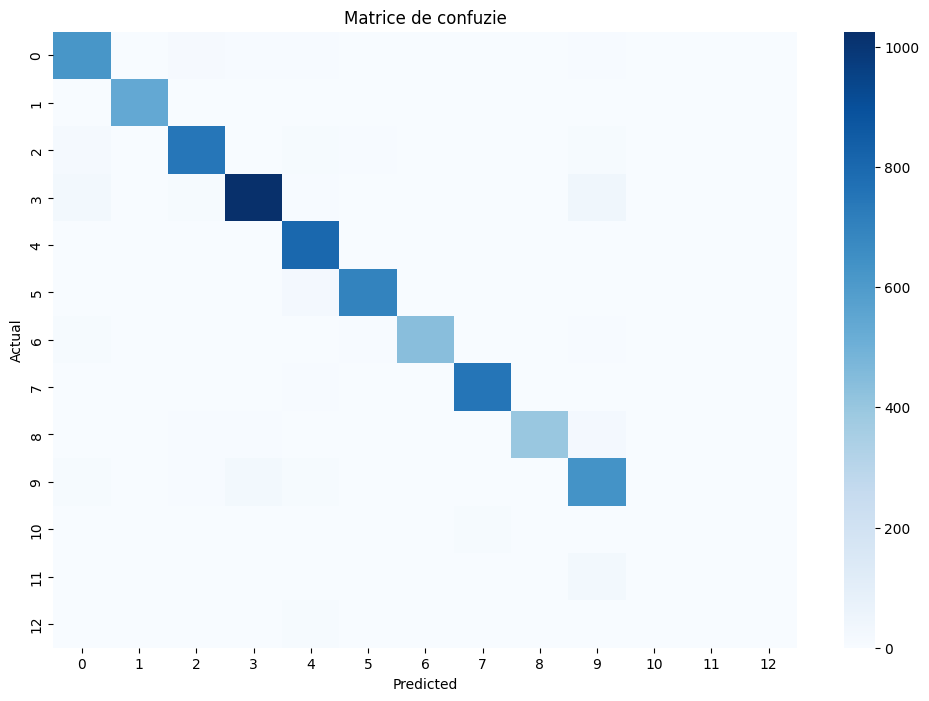

In [30]:
# --- Curățare NaN în setul de test ---
test_idx = y_test.notna()
X_test_clean = X_test[test_idx]
y_test_clean = y_test[test_idx]

# Vectorizare TF-IDF pentru datele de test curate
X_test_vectorized_clean = vectorizer.transform(X_test_clean)

# Predicții
y_pred = final_model.predict(X_test_vectorized_clean)

# Matrice de confuzie
cm = confusion_matrix(y_test_clean, y_pred, labels=y_train_clean.unique())

# Vizualizare
plt.figure(figsize=(12,8))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Matrice de confuzie")
plt.show()


# ### Concluzii
# - Logistic Regression a fost ales ca model final.
# - Modelul și vectorizatorul au fost salvați în `models/final_model.pkl`.